# COMP8260 – AI Systems Class 2

We are exploring classification on the adult dataset, which is designed to predict high
income earners (>50k$) from US census information such as education, hours of
work per week, etc. While approaching the exercises below it could be useful to keep the
following pages open in your browser:  

sklearn API https://scikit-learn.org/stable/modules/classes.html  

pandas getting started tutorial
https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html  

pyplot tutorial https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [3]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

# Load the adult dataset (version 2) from openml.org using the sklearn.datasets.fetch_openml function.
# The dataset contains 48842 instances, 14 attributes and 2 classes (binary classification).
# The data is stored in a pandas dataframe.
adult = datasets.fetch_openml('adult', version=2, as_frame=True)

/opt/jupyterhub/pyvenv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Print the type of each feature to see if they are 
# categorical or numeric (hint you can use pandas.Dataframe.info to get 
# information about columns in the DataFrame)
adult.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  float64 
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  float64 
 3   education       48842 non-null  category
 4   education-num   48842 non-null  float64 
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  float64 
 11  capital-loss    48842 non-null  float64 
 12  hours-per-week  48842 non-null  float64 
 13  native-country  47985 non-null  category
dtypes: category(8), float64(6)
memory usage: 2.6 MB


In [5]:
# Print out the size of the dataset (number of instances) and the 
# distribution of the target across the two classes using 
# pandas.Series.value_counts
print(adult.data.shape)
print(adult.target.value_counts())

(48842, 14)
class
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [6]:
# Split the data into a train datasets (X_train, y_train) and test dataset 
# (X_test, y_test), using the sklearn.model_selection. 
# train_test_split function. Verify the size of each dataset looking at the 
# shape attribute.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult.data, adult.target, test_size=0.33, random_state=42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32724, 14)
(16118, 14)
(32724,)
(16118,)


In [7]:
# Create an X_train_num training dataset by dropping the non-numerical features 
# from the input data, (Hint you can select the relevant columns using [] and a list of 
# column names, or use pandas.Dataframe.drop to drop the categorical 
# columns or use pandas.DataFrame.select_dtypes).
X_train_num = X_train.select_dtypes(include=np.number)

In [8]:
# Train a DecisionTreeClassifier with default parameters to predict the 
# target class from the numerical attributes of input using its fit method. Compute the 
# accuracy of the classifier over the training data and the test data. Hint: you can use 
# the predict method of the classifier to obtain the predicted labels from the train 
# and test inputs and use sklearn.metrics.accuracy_score to compute the 
# accuracy. Does the decision tree seem to overfit? Why? Print out the depth and the 
# number of leaves for the tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train_num, y_train)
y_pred_train = dt.predict(X_train_num)
y_pred_test = dt.predict(X_test.select_dtypes(include=np.number))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(dt.get_depth())
print(dt.get_n_leaves())

0.9989610072118323
0.7746618687182033
57
6651


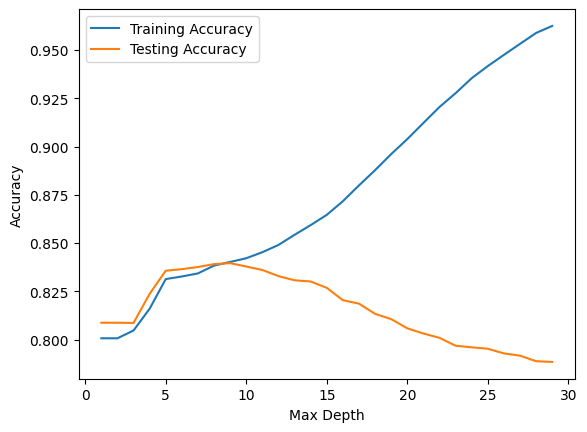

In [9]:
# Plot the training and testing accuracy vs the maximum tree depth.
train_acc = []
test_acc = []
for i in range(1, 30):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train_num, y_train)
    y_pred_train = dt.predict(X_train_num)
    y_pred_test = dt.predict(X_test.select_dtypes(include=np.number))
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
plt.plot(range(1, 30), train_acc, label="Training Accuracy")
plt.plot(range(1, 30), test_acc, label="Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

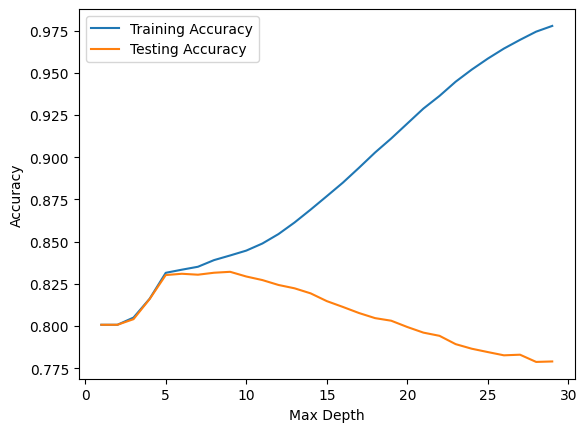

In [10]:
# Change the plot above to show the average 3-fold training and validation score using 
# the cross_validate function. Hint: to return the training scores for each fold you need 
# to specify return_train_score=True
from sklearn.model_selection import cross_validate
train_acc = []
test_acc = []
for i in range(1, 30):
    dt = DecisionTreeClassifier(max_depth=i)
    scores = cross_validate(dt, X_train_num, y_train, cv=3, return_train_score=True)
    train_acc.append(scores['train_score'].mean())
    test_acc.append(scores['test_score'].mean())
plt.plot(range(1, 30), train_acc, label="Training Accuracy")
plt.plot(range(1, 30), test_acc, label="Testing Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Use sklearn.model_selection.GridSearchCV to find the best combination of max_depth, 
# min_samples_split and min_samples_leaf to constrain the complexity of the tree. 
# Keep each parameter to max 3-4 choices or the computation would take a long 
# amount of time.
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10)}
gs = GridSearchCV(dt, params, cv=3)
gs.fit(X_train_num, y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_.get_depth())
print(gs.best_estimator_.get_n_leaves())

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 9}
0.8337000366703337
9
164


In [12]:
# Obtain an X_train_cat by keeping only the categorical features from X_train. 
# Sklearn’s DecisionTreeClassifier implementation does not natively support learning 
# from categorical features. Use sklearn.preprocessing.OneHotEncoder to transform 
# X_train_cat into X_train_enc (using the fit and the transform method) and train a 
# DecisionTreeClassifier using it. Compare its test and training performance with the 
# decision tree computed using the numerical features.
from sklearn.preprocessing import OneHotEncoder
X_train_cat = X_train.select_dtypes(exclude=np.number)
enc = OneHotEncoder()
enc.fit(X_train_cat)
X_train_enc = enc.transform(X_train_cat)
dt = DecisionTreeClassifier()
dt.fit(X_train_enc, y_train)
y_pred_train = dt.predict(X_train_enc)
y_pred_test = dt.predict(enc.transform(X_test.select_dtypes(exclude=np.number)))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test)) 

0.8644419997555312
0.8226827149770443


In [13]:
# Did X_train_cat contain any missing values? Can you figure out what happened to 
# the missing values during the encoding by looking at the output of the 
# get_feature_names_out() method of the encoder?
print(X_train_cat.isna().sum())
print(enc.get_feature_names_out())

workclass         1888
education            0
marital-status       0
occupation        1896
relationship         0
race                 0
sex                  0
native-country     563
dtype: int64
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Never-worked'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pay' 'workclass_nan'
 'education_10th' 'education_11th' 'education_12th' 'education_1st-4th'
 'education_5th-6th' 'education_7th-8th' 'education_9th'
 'education_Assoc-acdm' 'education_Assoc-voc' 'education_Bachelors'
 'education_Doctorate' 'education_HS-grad' 'education_Masters'
 'education_Preschool' 'education_Prof-school' 'education_Some-college'
 'marital-status_Divorced' 'marital-status_Married-AF-spouse'
 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation

In [17]:
# Use SimpleImputer to fill in the missing values in X_train_cat using the most frequent value of the 
# missing attributes before encoding. Print the set of encoded features 
# and the classification performance
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
# Fit the SimpleImputer on the entire dataset
imp.fit(pd.concat([X_train_cat, X_test.select_dtypes(exclude=np.number)]))

# Transform the training and test data
X_train_cat_imp = pd.DataFrame(imp.transform(X_train_cat))
X_test_cat_imp = pd.DataFrame(imp.transform(X_test.select_dtypes(exclude=np.number)))

# Fit the OneHotEncoder on the imputed dataset
enc.fit(pd.concat([X_train_cat_imp, X_test_cat_imp]))

# Transform the training and test data
X_train_enc = enc.transform(X_train_cat_imp)
X_test_enc = enc.transform(X_test_cat_imp)

# Continue with the rest of your code...
dt = DecisionTreeClassifier()
dt.fit(X_train_enc, y_train)
y_pred_train = dt.predict(X_train_enc)
y_pred_test = dt.predict(X_test_enc)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(enc.get_feature_names_out())

0.8619361936193619
0.8211316540513711
['x0_Federal-gov' 'x0_Local-gov' 'x0_Never-worked' 'x0_Private'
 'x0_Self-emp-inc' 'x0_Self-emp-not-inc' 'x0_State-gov' 'x0_Without-pay'
 'x1_10th' 'x1_11th' 'x1_12th' 'x1_1st-4th' 'x1_5th-6th' 'x1_7th-8th'
 'x1_9th' 'x1_Assoc-acdm' 'x1_Assoc-voc' 'x1_Bachelors' 'x1_Doctorate'
 'x1_HS-grad' 'x1_Masters' 'x1_Preschool' 'x1_Prof-school'
 'x1_Some-college' 'x2_Divorced' 'x2_Married-AF-spouse'
 'x2_Married-civ-spouse' 'x2_Married-spouse-absent' 'x2_Never-married'
 'x2_Separated' 'x2_Widowed' 'x3_Adm-clerical' 'x3_Armed-Forces'
 'x3_Craft-repair' 'x3_Exec-managerial' 'x3_Farming-fishing'
 'x3_Handlers-cleaners' 'x3_Machine-op-inspct' 'x3_Other-service'
 'x3_Priv-house-serv' 'x3_Prof-specialty' 'x3_Protective-serv' 'x3_Sales'
 'x3_Tech-support' 'x3_Transport-moving' 'x4_Husband' 'x4_Not-in-family'
 'x4_Other-relative' 'x4_Own-child' 'x4_Unmarried' 'x4_Wife'
 'x5_Amer-Indian-Eskimo' 'x5_Asian-Pac-Islander' 'x5_Black' 'x5_Other'
 'x5_White' 'x6_Female' 'x6

In [18]:
# Automate the use of SimpleImputer and OneHotEncoder by creating a Pipeline. 
# Create a Pipeline with a SimpleImputer, OneHotEncoder and a 
# DecisionTreeClassifier. Train and verify the accuracy of the pipeline.
from sklearn.pipeline import Pipeline
pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder()), ('dt', DecisionTreeClassifier())])
pipe.fit(X_train_cat, y_train)
y_pred_train = pipe.predict(X_train_cat)
y_pred_test = pipe.predict(X_test.select_dtypes(exclude=np.number))
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8619361936193619
0.8213177813624519


In [19]:
#  It would be nice see if a Decision Tree classifier would be able to reach a higher 
# accuracy by considering both categorical and numerical features. To do so we could 
# start from the full dataset X_train and apply a transformer to only a subset of the 
# attributes (DataFrame columns). Use a ColumnTransformer to apply the categorical 
# pre-processing pipeline (composed by an Imputer and one OneHotEncoder) to the 
# categorical attributes of the data, leaving the numerical attribute unaltered (hint: 
# have a look at the remainder parameter of ColumnTransformer).
from sklearn.compose import ColumnTransformer
pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())])
ct = ColumnTransformer([('cat', pipe, X_train_cat.columns)], remainder='passthrough')
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train_enc, y_train)
y_pred_train = dt.predict(X_train_enc)
y_pred_test = dt.predict(X_test_enc)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9999083241657499
0.8208834843032634


In [20]:
# Define a Pipeline composed of the ColumnTransformer above and a 
# DecisionTreeClassifier and train and verify the accuracy of the Pipeline. Does the use 
# of both types of features improve the accuracy?
pipe = Pipeline([('ct', ct), ('dt', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9999083241657499
0.8206973569921826


In [21]:
# Train a RandomForestClassifier on the full dataset, modifying the pipeline of the 
# previous point. Compare the training and testing accuracy with the previous cases: 
# does the classifier overfit the data? How does the accuracy compare with the 
# previous DecisionTrees? Print out the size of each tree in the ensemble
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('ct', ct), ('rf', RandomForestClassifier())])
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(pipe['rf'].estimators_[0].get_depth())
print(pipe['rf'].estimators_[0].get_n_leaves())

0.9998777655543332
0.8594738801340117
65
5876


In [24]:
# Train an AdaBoostClassifier on the dataset. Compare train and test accuracy with 
# random forest print out the size of each tree in the ensemble. Compare the 
# performance of the classifier with a RandomForestClassifier that uses the same 
# number of trees and max_depth as the AdaBoostClassifier.
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([('ct', ct), ('ada', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(pipe['ada'].estimators_[0].get_depth())
print(pipe['ada'].estimators_[0].get_n_leaves())
pipe = Pipeline([('ct', ct), ('rf', RandomForestClassifier(n_estimators=1, max_depth=2))])
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(pipe['rf'].estimators_[0].get_depth())
print(pipe['rf'].estimators_[0].get_n_leaves())

0.8579330155237745
0.8659883360218389
1
2
0.7590453489793424
0.7641146544236258
2
4


In [23]:
# Train a GradientBoostingClassifier on the dataset and compare the performance 
# with the above.
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('ct', ct), ('gb', GradientBoostingClassifier())])
pipe.fit(X_train, y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))
print(pipe['gb'].estimators_[0][0].get_depth())
print(pipe['gb'].estimators_[0][0].get_n_leaves())  

0.8674673022857842
0.8723787070356124
3
8
